In [ ]:
Sentiment analysis project

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
df = pd.read_csv(r"E:\jd\sentiment Dataset.csv")  
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Text Cleaning

In [9]:
ps = PorterStemmer()
stop_words = stopwords.words('english')

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # removes symbols
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


# WordCloud for Positive & Negative Reviews

In [12]:
# Separate positive and negative text
positive_text = " ".join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['cleaned_review'])

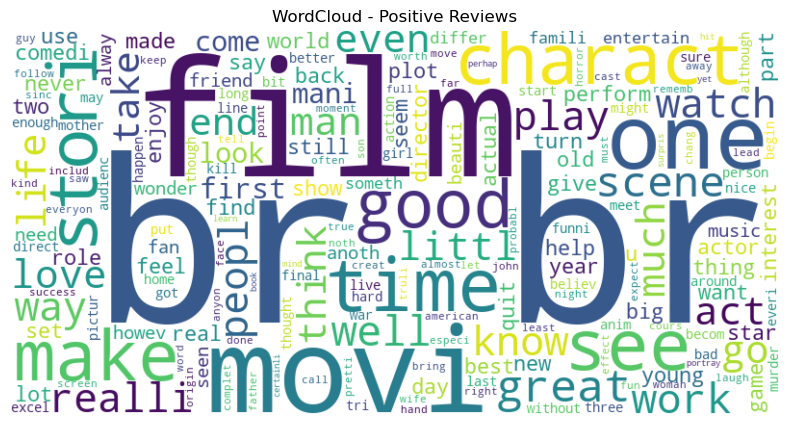

In [14]:
# Generate WordCloud for positive sentiment
plt.figure(figsize=(10,5))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()

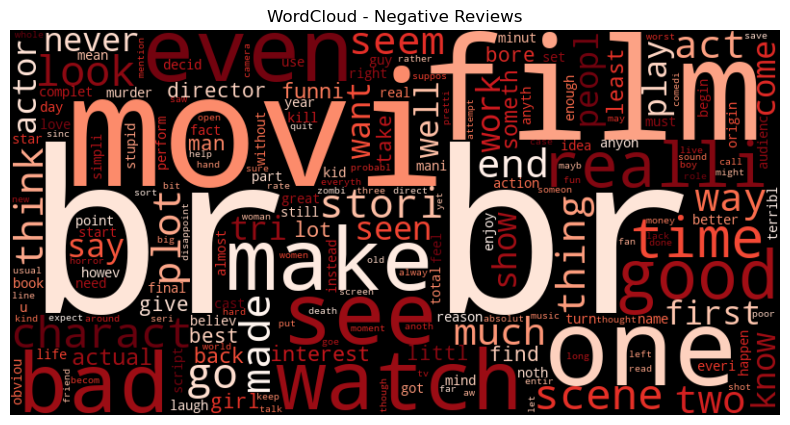

In [16]:
# Generate WordCloud for negative sentiment
plt.figure(figsize=(10,5))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Reviews")
plt.show()

# Vectorizing & Model Training

In [19]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.76

Confusion Matrix:
 [[48  2]
 [22 28]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.96      0.80        50
    positive       0.93      0.56      0.70        50

    accuracy                           0.76       100
   macro avg       0.81      0.76      0.75       100
weighted avg       0.81      0.76      0.75       100



# Test a Custom Review

In [25]:
sample = ["The film was boring and slow, I hated it"]
sample_clean = [clean_text(sample[0])]
sample_vector = tfidf.transform(sample_clean).toarray()
print("Predicted Sentiment:", model.predict(sample_vector)[0])

Predicted Sentiment: negative
